<a href="https://colab.research.google.com/github/kitiluck/BSC_DPDM23/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

In [3]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [4]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [5]:
credit = pd.read_csv('/content/drive/MyDrive/BSC_DPDM2023/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [7]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [8]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

## divide data into train and test

In [9]:
import numpy as np

In [10]:
np.random.seed(seed=1)

In [11]:
a = np.random.randint(2, size=len(credit))

In [12]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [13]:
train = credit[a == 1]
train.shape

(324, 9)

In [14]:
test = credit[a == 0]
test.shape

(366, 9)

In [32]:
train

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.250,1,1,1,0,1,0,1
1,4.460,3.040,1,1,6,0,1,560,1
4,5.625,1.710,1,0,0,0,3,0,1
5,4.000,2.500,1,0,0,1,1,0,1
6,1.040,6.500,1,0,0,1,1,31285,1
...,...,...,...,...,...,...,...,...,...
676,10.665,0.085,0,1,12,1,1,3,0
677,7.250,0.040,0,1,1,0,1,1,0
678,10.210,0.000,0,0,0,0,1,50,0
680,0.290,0.290,0,0,0,0,1,364,0


## Start Decision Tree

### import

In [15]:
from sklearn.tree import DecisionTreeClassifier

### define

In [16]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### train

In [17]:
X_train = train.iloc[:,:-1]

In [18]:
y_train = train.iloc[:,-1]

In [19]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
from sklearn import tree

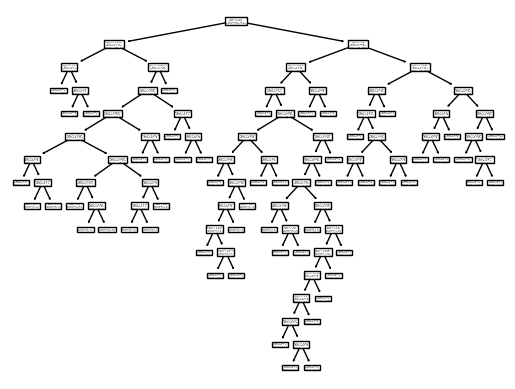

In [33]:
tree.plot_tree(Dtree1);

### test

In [22]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [23]:
y_predict = Dtree1.predict(X_test)

In [24]:
 from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_predict)

0.825136612021858

## Set parameter

### Import

In [26]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [34]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=2)

### Train

In [36]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

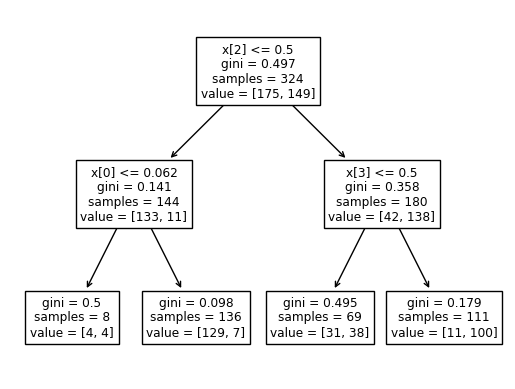

In [37]:
tree.plot_tree(Dtree2);

### Test

In [30]:
y_predict2 = Dtree2.predict(X_test)

In [31]:
accuracy_score(y_test, y_predict2)

0.8579234972677595

# HW3

ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameter ของตัวเอง
scikit learm เข้าไปแก้ไข

1. criterion, max _leaf_nodes